In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

# 1. Read the dataset to the python environment.

In [2]:
df=pd.read_csv('iris1.csv')

In [3]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Do necessary pre-processing steps.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are null values in 3 columns

In [6]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# filling the null value

In [8]:
df.groupby('Classification')['SL'].mean()

Classification
Iris-setosa        5.008511
Iris-versicolor    5.925000
Iris-virginica     6.616667
Name: SL, dtype: float64

In [9]:
df.groupby('Classification')['SW'].mean()

Classification
Iris-setosa        3.408511
Iris-versicolor    2.781250
Iris-virginica     2.967347
Name: SW, dtype: float64

In [10]:
df.groupby('Classification')['PL'].mean()

Classification
Iris-setosa        1.468750
Iris-versicolor    4.252083
Iris-virginica     5.547917
Name: PL, dtype: float64

In [11]:
df['SL'] = df['SL'].fillna(df.groupby('Classification')['SL'].transform('mean'))
df['SW'] = df['SW'].fillna(df.groupby('Classification')['SW'].transform('mean'))
df['PL'] = df['PL'].fillna(df.groupby('Classification')['PL'].transform('mean'))

In [12]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
# Outliers Analysis

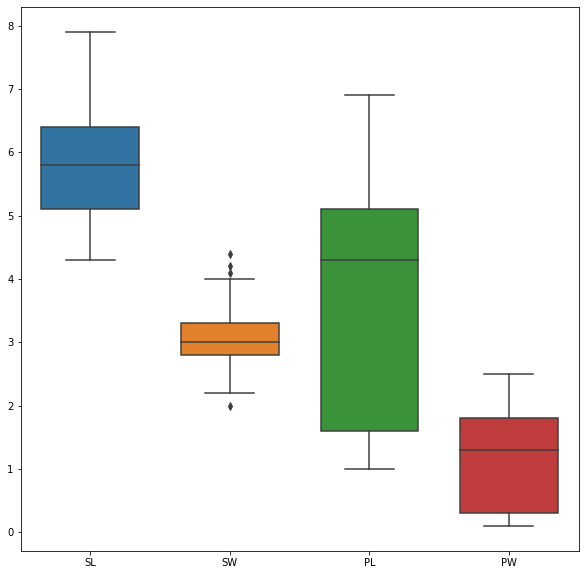

In [14]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = df.drop(['Classification'],axis=1), width=.7)
plt.show()

In [15]:
#remove the outliers

In [16]:
Q1=np.quantile(df['SW'], .25)
Q2=np.quantile(df['SW'], .50)
Q3=np.quantile(df['SW'], .75)
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [17]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print(IQR)
print(low_lim)
print(upper_lim)

0.5
2.05
4.05


In [18]:
df1=df[(df['SW']<low_lim)|(df['SW']>upper_lim)]
index=df1.index
index

Int64Index([15, 32, 33, 60], dtype='int64')

In [19]:
df.drop(index, inplace=True)
df

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.400000,0.2,Iris-setosa
1,4.900000,3.0,1.400000,0.2,Iris-setosa
2,5.008511,3.2,1.300000,0.2,Iris-setosa
3,4.600000,3.1,1.500000,0.2,Iris-setosa
4,5.000000,3.6,1.400000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.200000,2.3,Iris-virginica
146,6.300000,2.5,5.000000,1.9,Iris-virginica
147,6.500000,3.0,5.547917,2.0,Iris-virginica
148,6.200000,3.4,5.400000,2.3,Iris-virginica


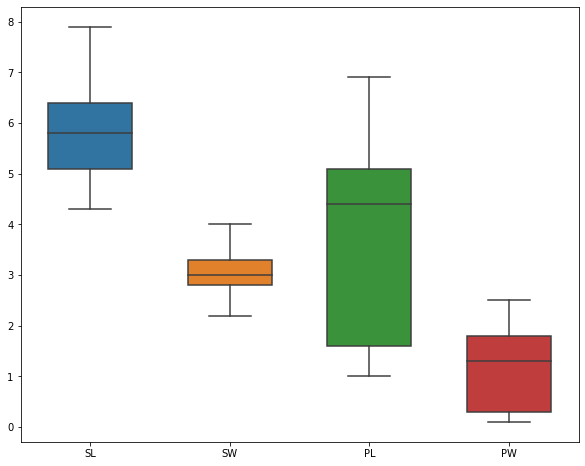

In [20]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = df.drop(['Classification'],axis=1), width=.6)
plt.show()

In [21]:
df.shape

(146, 5)

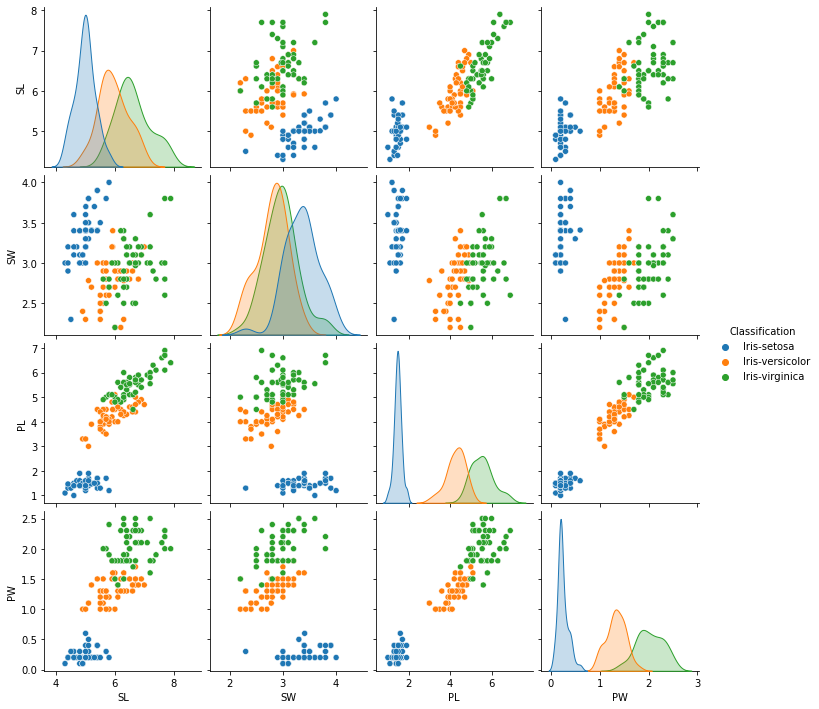

In [22]:
sns.pairplot(df,hue='Classification')

<AxesSubplot:>

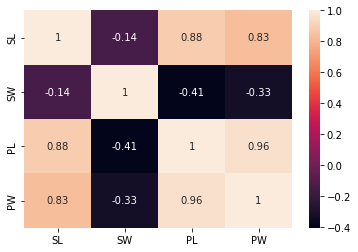

In [45]:
df.corr()
sns.heatmap(df.corr(),annot=True)

In [23]:
X=df.drop(['Classification'],axis=1)
y=(df['Classification'])

In [24]:
#spliting of data
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
X_train.shape

(109, 4)

# 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

## Logistic Regression

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(X_train,y_train)
y_pre=logit_model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))

Accuracy is: 0.972972972972973
f1_score is: 0.972972972972973


In [29]:
confusion_matrix(y_test, y_pre)

array([[16,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]], dtype=int64)

## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Classifier.fit(X_train,y_train)
    y_pre=Classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pre)
    acc_values.append(acc)

In [31]:
acc_values

[0.9459459459459459,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 1.0,
 0.972972972972973,
 0.972972972972973,
 0.9459459459459459,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.9459459459459459]

Text(0, 0.5, 'acccuracy')

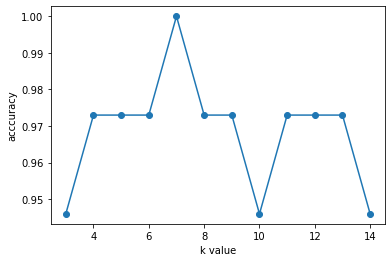

In [32]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('acccuracy')

In [33]:
Classifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski')
Classifier.fit(X_train,y_train)
y_pre=Classifier.predict(X_test)

In [34]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))

Accuracy is: 1.0
f1_score is: 1.0


In [35]:
confusion_matrix(y_test, y_pre)

array([[16,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 13]], dtype=int64)

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)
y_pre = RF.predict(X_test)

In [37]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))

Accuracy is: 0.9459459459459459
f1_score is: 0.9459459459459459


In [38]:
confusion_matrix(y_test, y_pre)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

## Kernal SVM

In [39]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)
y_pre = svm.predict(X_test)

In [40]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))

Accuracy is: 0.972972972972973
f1_score is: 0.972972972972973


In [41]:
confusion_matrix(y_test, y_pre)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

## DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pre=dt_model.predict(X_test)

In [43]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'micro'))

Accuracy is: 0.9459459459459459
f1_score is: 0.9459459459459459


In [44]:
confusion_matrix(y_test, y_pre)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

All the models performs good